<a href="https://colab.research.google.com/github/vantwoutmaarten/AlgoTrading/blob/master/algoTradingPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: This program uses the dual moving average crossover to determine when to buy and sell stock

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [50]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving BAC.csv to BAC.csv


In [69]:
# Store the data
BAC = pd.read_csv('BAC.csv')
# Show the data
BAC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-17,17.500000,17.600000,17.340000,17.420000,15.841514,70488600
1,2015-11-18,17.430000,17.870001,17.430000,17.840000,16.223455,85708300
2,2015-11-19,17.780001,17.850000,17.620001,17.690001,16.087051,51829700
3,2015-11-20,17.809999,17.830000,17.590000,17.650000,16.050676,56288300
4,2015-11-23,17.620001,17.730000,17.459999,17.469999,15.886983,50362900
...,...,...,...,...,...,...,...
1254,2020-11-10,27.490000,27.760000,27.180000,27.660000,27.660000,77694600
1255,2020-11-11,27.750000,27.770000,27.120001,27.340000,27.340000,48360900
1256,2020-11-12,26.840000,26.900000,26.309999,26.690001,26.690001,67912600
1257,2020-11-13,26.879999,27.209999,26.760000,27.000000,27.000000,52421000


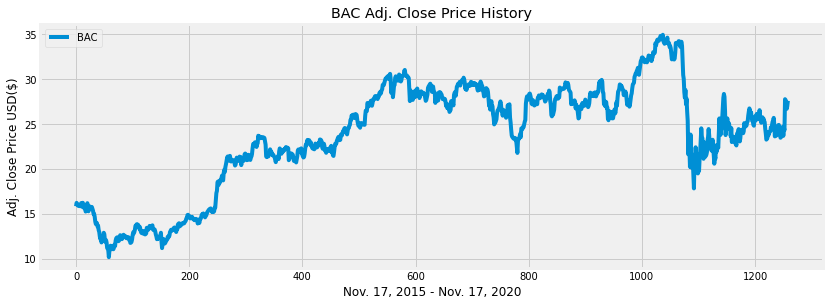

In [70]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(BAC['Adj Close'], label='BAC')
plt.title('BAC Adj. Close Price History')
plt.xlabel('Nov. 17, 2015 - Nov. 17, 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [71]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = BAC['Adj Close'].rolling(window=30).mean()
SMA30  

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,24.569333
1255,24.677667
1256,24.764000
1257,24.857000


In [72]:
#Create the simple moving average with a 30 day window
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = BAC['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,24.657248
1255,24.686151
1256,24.706866
1257,24.740413


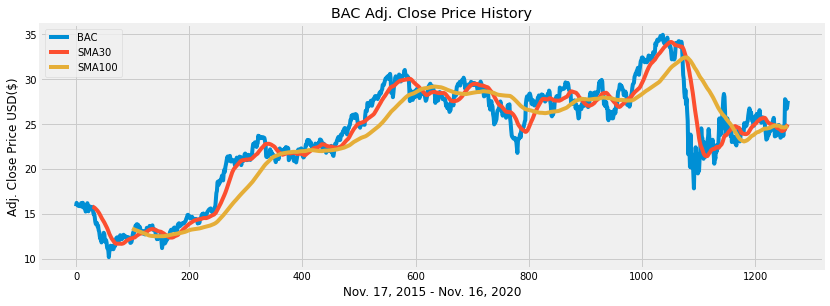

In [73]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(BAC['Adj Close'], label='BAC')
plt.plot(SMA30['Adj Close Price'], label='SMA30')
plt.plot(SMA100['Adj Close Price'], label='SMA100')
plt.title('BAC Adj. Close Price History')
plt.xlabel('Nov. 17, 2015 - Nov. 16, 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [74]:
data = pd.DataFrame()
data['BAC'] = BAC['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']

In [83]:
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['BAC'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceSell.append(np.nan)
        sigPriceBuy.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['BAC'][i])
        flag = 0
      else:
        sigPriceSell.append(np.nan)
        sigPriceBuy.append(np.nan)
    else:
      sigPriceSell.append(np.nan)
      sigPriceBuy.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

In [84]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]


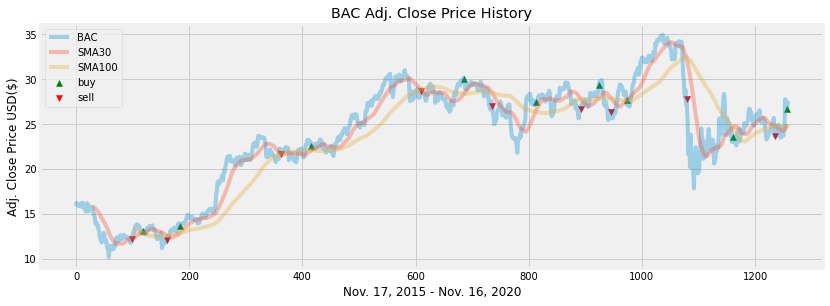

In [88]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.5, 4.5))
plt.plot(BAC['Adj Close'], label='BAC', alpha=0.35)
plt.plot(SMA30['Adj Close Price'], label='SMA30', alpha=0.35)
plt.plot(SMA100['Adj Close Price'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'] , label = 'buy', marker = "^", color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'sell', marker = "v", color = 'red')
plt.title('BAC Adj. Close Price History')
plt.xlabel('Nov. 17, 2015 - Nov. 16, 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [110]:
#calculate profit of strategy using when buying selling one share.
profit = 0
flag = 0

for i in range(len(data)):
  
  if data['Sell_Signal_Price'][i] != (np.nan):
    if flag != 0:
      profit += data['BAC'][i]
      flag = 0
  if data['Buy_Signal_Price'][i] != np.nan: 
    if flag != 1:
      last_buy = data['BAC'][i]
      profit -= data['BAC'][i]
      flag = 1
if flag == 1:
  profit += last_buy

profit   


11.738485999999995

In [ ]:
data